# K-Means

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import the dataset

In [3]:
df = pd.read_csv("Cricket.csv", encoding='latin1')

## Basic EDA

In [4]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [5]:
df.shape

(79, 13)

In [6]:
df.describe()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,245.075949,230.544304,30.037975,7618.139241,38.523291,9684.455696,79.295316,11.556962,46.443038,13.253165
std,74.211716,70.321022,14.421710,2551.873313,5.919093,3193.835825,9.925307,8.092014,16.351701,5.925755
min,128.000000,127.000000,4.000000,5080.000000,23.570000,5504.000000,60.570000,0.000000,23.000000,3.000000
25%,188.000000,177.000000,17.500000,5759.000000,34.600000,7393.500000,73.725000,6.000000,34.500000,9.000000
50%,232.000000,217.000000,29.000000,6798.000000,37.870000,9134.000000,77.730000,10.000000,42.000000,13.000000
75%,281.500000,261.500000,40.000000,8739.500000,41.845000,10976.000000,85.180000,15.500000,54.000000,16.000000
max,463.000000,452.000000,70.000000,18426.000000,53.940000,21367.000000,117.000000,49.000000,96.000000,34.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


## Null Values

In [8]:
df.isnull().sum()

Player    0
Span      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
dtype: int64

## Dealing the span column

In [10]:
# to convert the span into years of experience
# we first split the span into start and end and store in new column

df[['Strt','End']] = df.Span.str.split("-",expand=True) 

In [11]:
# convert them as int and
# find years of exp as end year - start year
# later drop the unneceassry columns such as start, end and span
# we are only left with the experience column now

df[['Strt','End']]=df[['Strt','End']].astype(int)
df['Exp']=df['End']-df['Strt']
df=df.drop(['Strt','End','Span'], axis = 1)
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


## Dealing the HS column

\d+ will extract the numeric value out the string

In [12]:
df.HS=df.HS.str.extract('(\d+)')
df.HS=df.HS.astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Mat     79 non-null     int64  
 2   Inns    79 non-null     int64  
 3   NO      79 non-null     int64  
 4   Runs    79 non-null     int64  
 5   HS      79 non-null     int64  
 6   Ave     79 non-null     float64
 7   BF      79 non-null     int64  
 8   SR      79 non-null     float64
 9   100     79 non-null     int64  
 10  50      79 non-null     int64  
 11  0       79 non-null     int64  
 12  Exp     79 non-null     int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 8.1+ KB


## Data Visualization

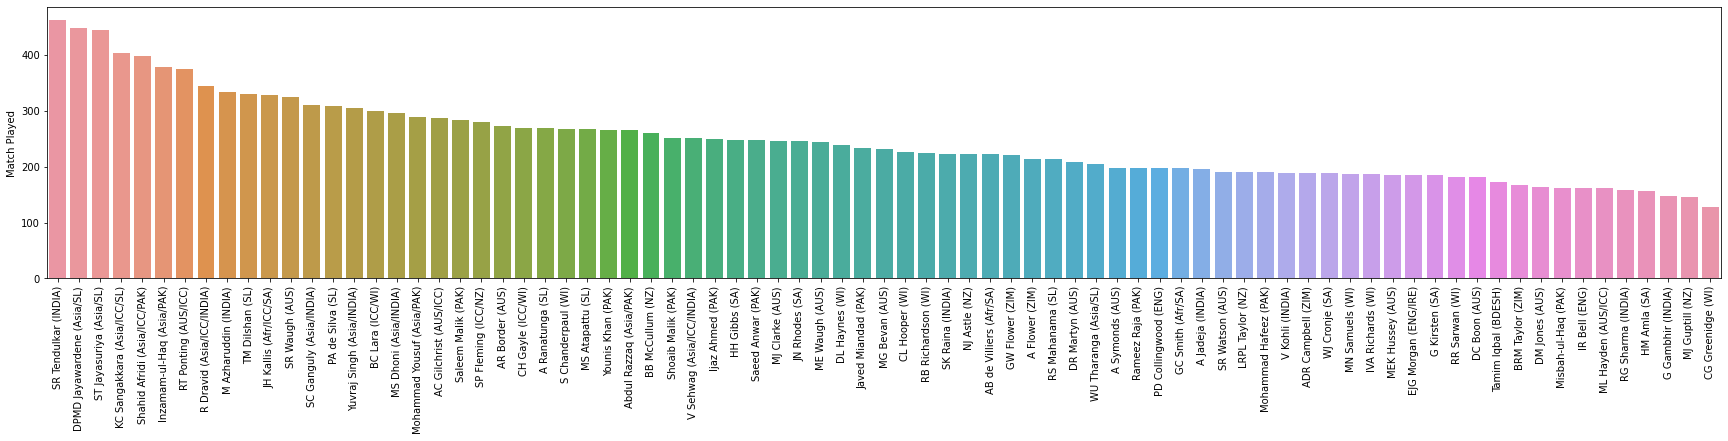

In [14]:
#Match Played

plt.figure(figsize = (30,5))
mat = df[['Player','Mat']].sort_values('Mat', ascending = False)
ax = sns.barplot(x='Player', y='Mat', data= mat)
ax.set(xlabel = '', ylabel= 'Match Played')
plt.xticks(rotation=90)
plt.show()

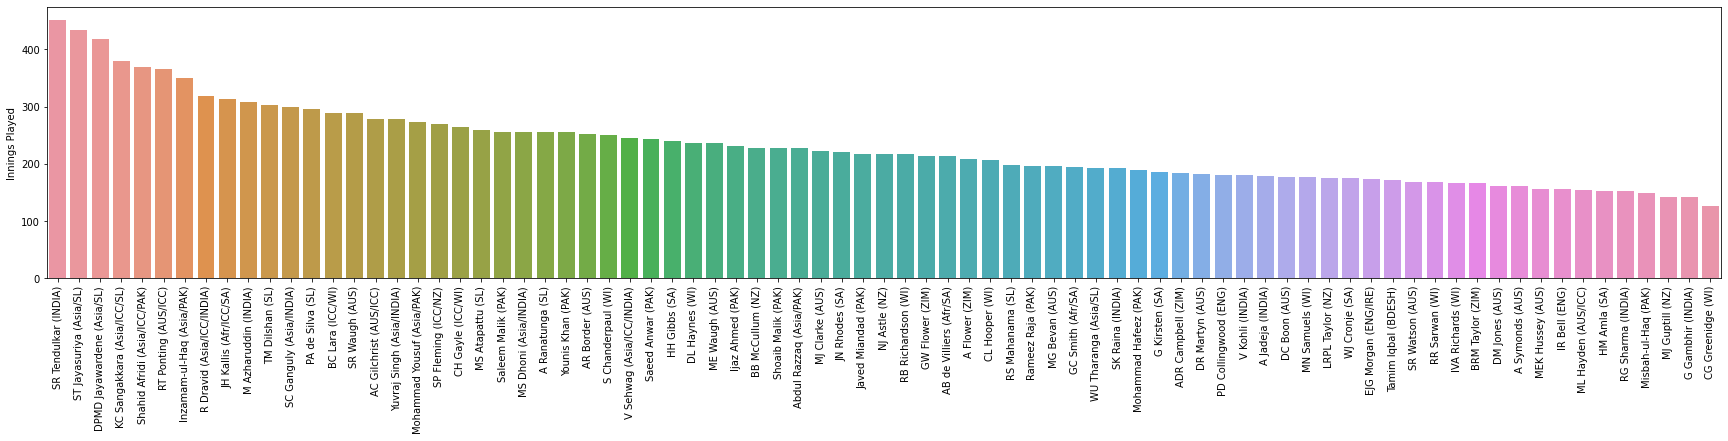

In [15]:
plt.figure(figsize = (30,5))
inns = df[['Player','Inns']].sort_values('Inns', ascending = False)
ax = sns.barplot(x='Player', y='Inns', data= inns)
ax.set(xlabel = '', ylabel= 'Innings Played')
plt.xticks(rotation=90)
plt.show()

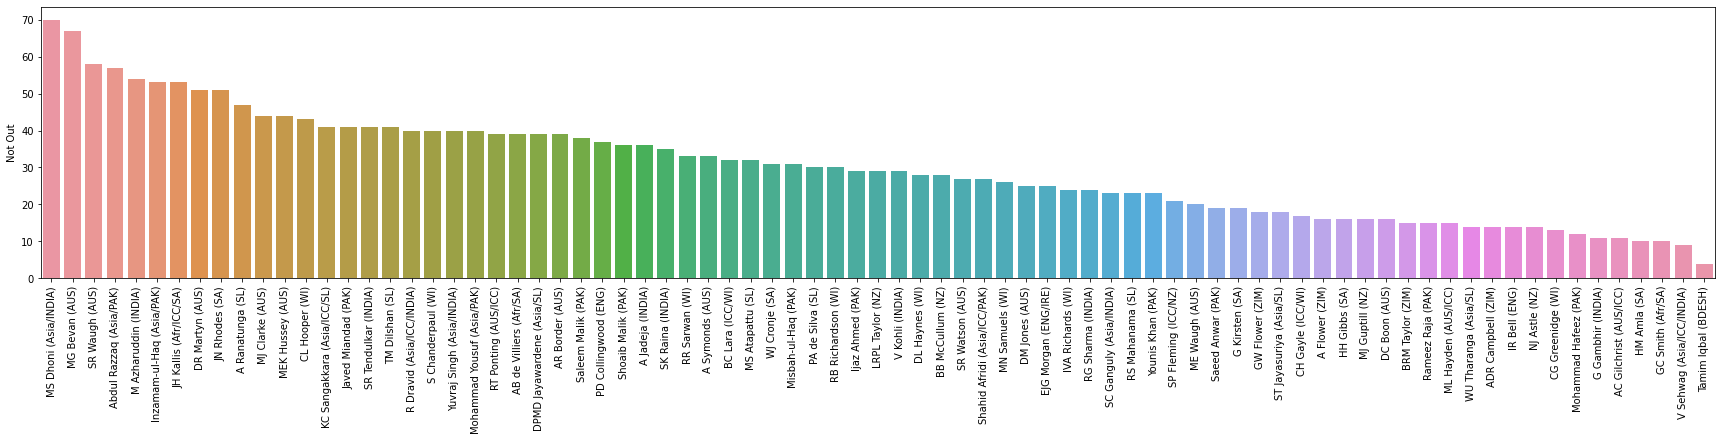

In [16]:
plt.figure(figsize = (30,5))
no = df[['Player','NO']].sort_values('NO', ascending = False)
ax = sns.barplot(x='Player', y='NO', data= no)
ax.set(xlabel = '', ylabel= 'Not Out')
plt.xticks(rotation=90)
plt.show()

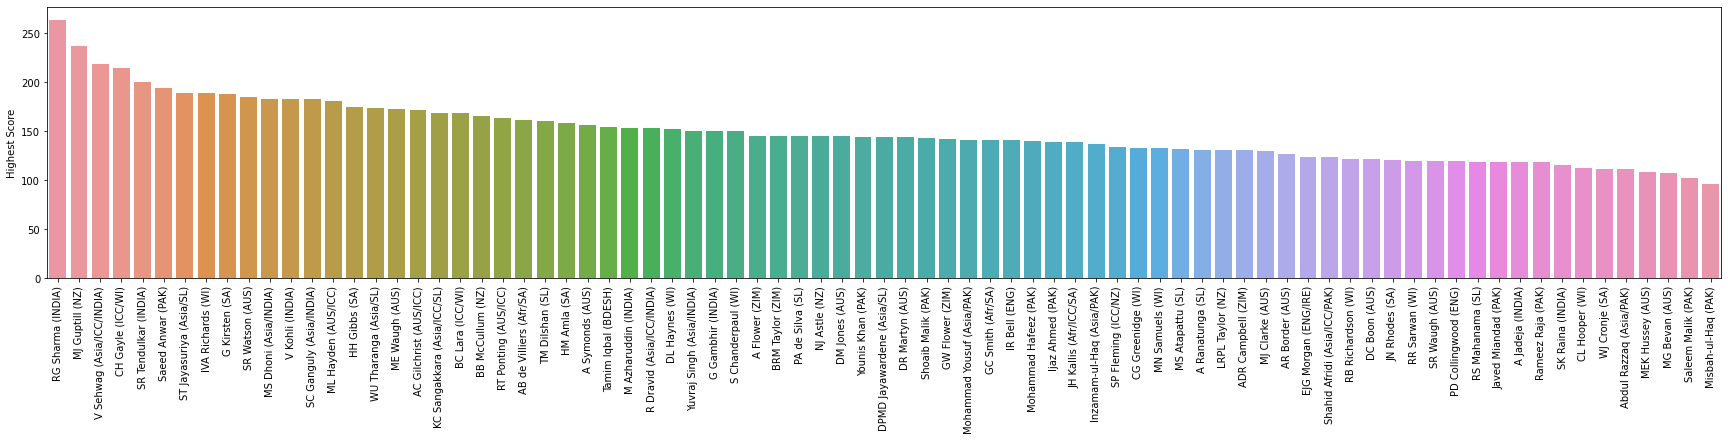

In [17]:
plt.figure(figsize = (30,5))
hs = df[['Player','HS']].sort_values('HS', ascending = False)
ax = sns.barplot(x='Player', y='HS', data= hs)
ax.set(xlabel = '', ylabel= 'Highest Score')
plt.xticks(rotation=90)
plt.show()

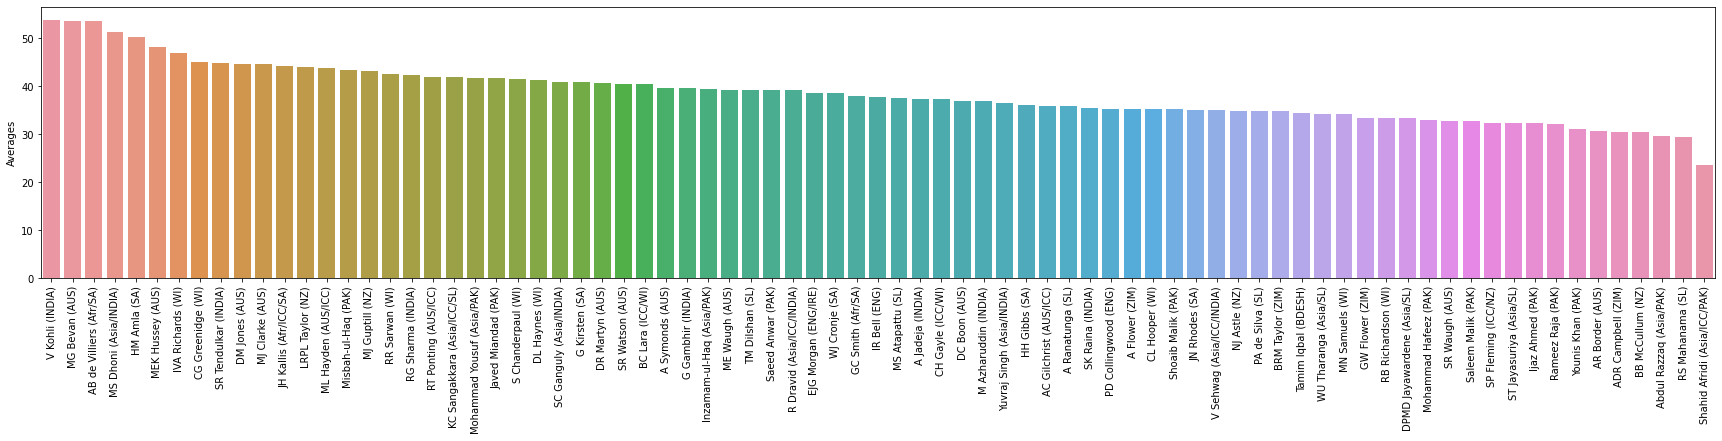

In [18]:
plt.figure(figsize = (30,5))
ave = df[['Player','Ave']].sort_values('Ave', ascending = False)
ax = sns.barplot(x='Player', y='Ave', data= ave)
ax.set(xlabel = '', ylabel= 'Averages')
plt.xticks(rotation=90)
plt.show()

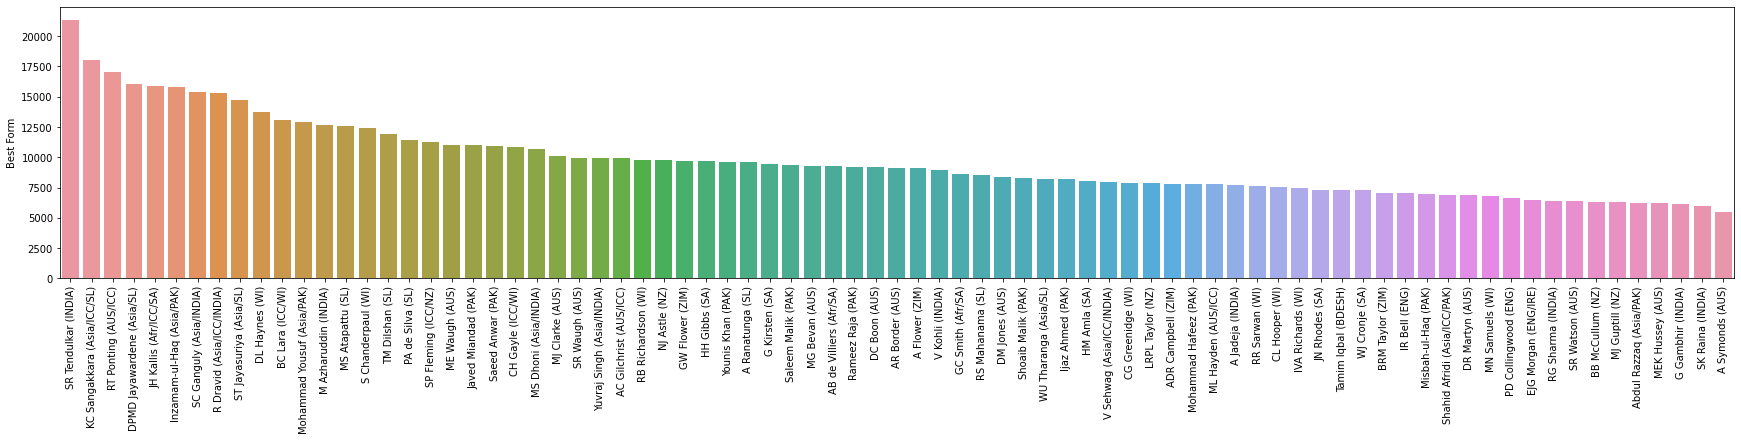

In [19]:
plt.figure(figsize = (30,5))
bf = df[['Player','BF']].sort_values('BF', ascending = False)
ax = sns.barplot(x='Player', y='BF', data= bf)
ax.set(xlabel = '', ylabel= 'Best Form')
plt.xticks(rotation=90)
plt.show()

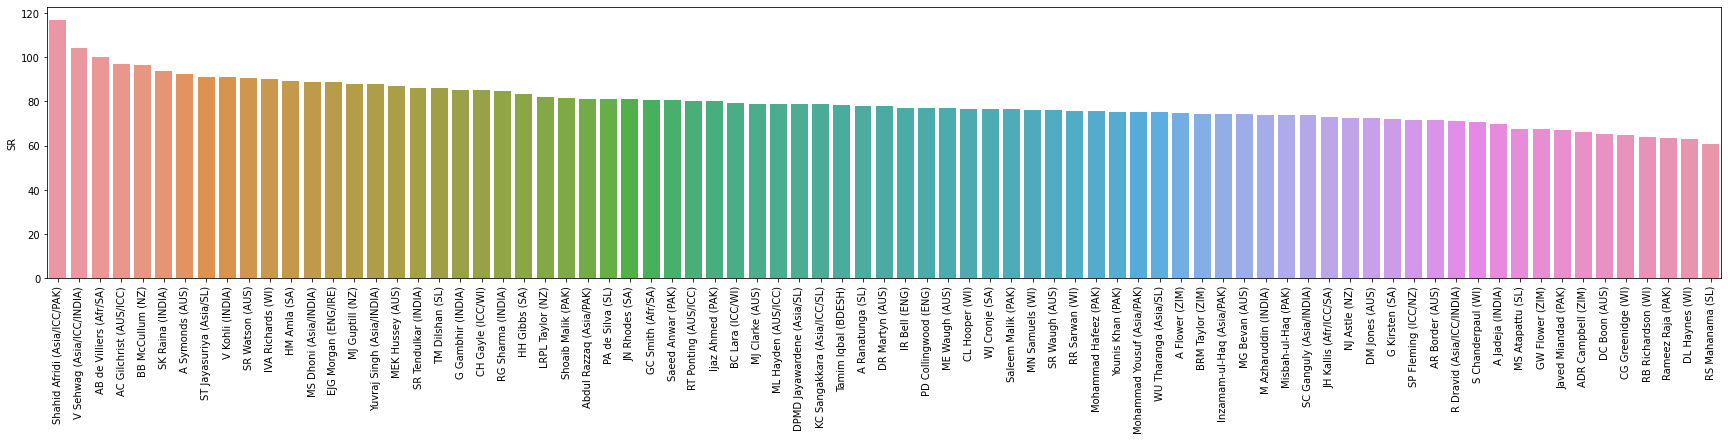

In [20]:
plt.figure(figsize = (30,5))
sr = df[['Player','SR']].sort_values('SR', ascending = False)
ax = sns.barplot(x='Player', y='SR', data= sr)
ax.set(xlabel = '', ylabel= 'SR')
plt.xticks(rotation=90)
plt.show()

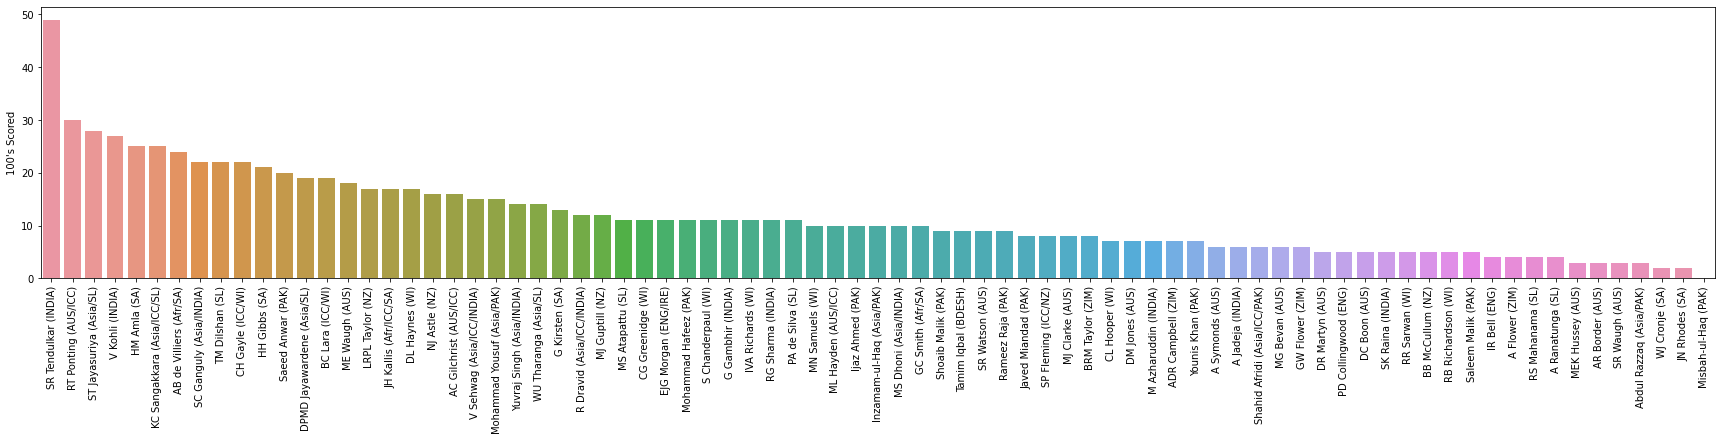

In [21]:
plt.figure(figsize = (30,5))
r100 = df[['Player','100']].sort_values('100', ascending = False)
ax = sns.barplot(x='Player', y='100', data= r100)
ax.set(xlabel = '', ylabel= "100's Scored" )
plt.xticks(rotation=90)
plt.show()

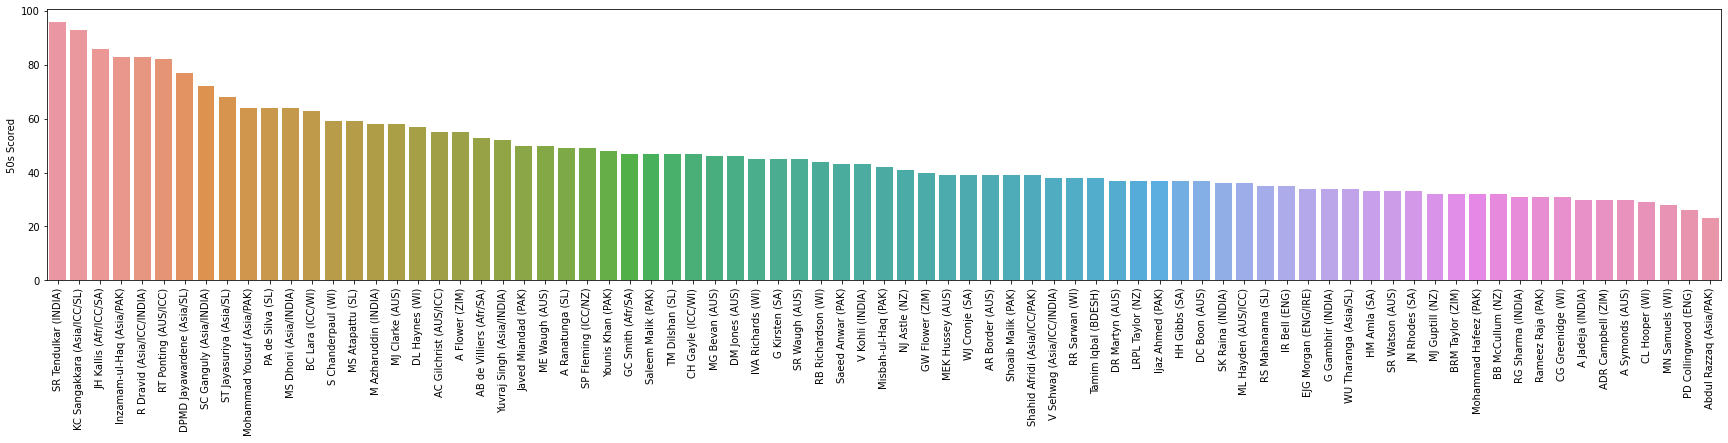

In [22]:
plt.figure(figsize = (30,5))
r50 = df[['Player','50']].sort_values('50', ascending = False)
ax = sns.barplot(x='Player', y='50', data= r50)
ax.set(xlabel = '', ylabel= "50s Scored")
plt.xticks(rotation=90)
plt.show()

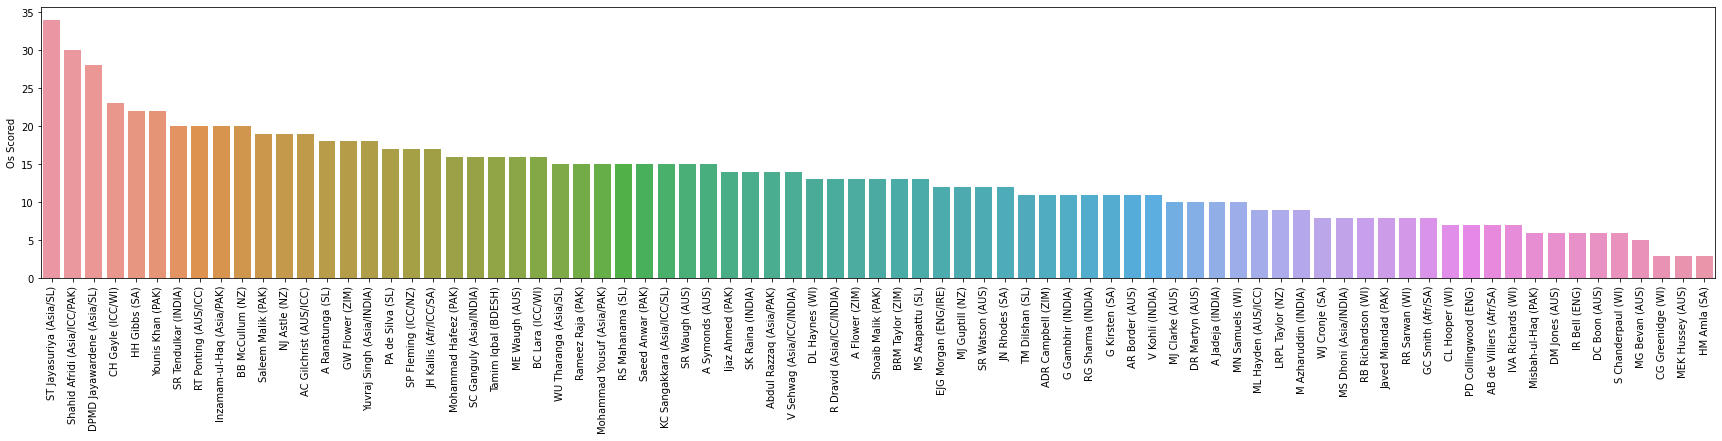

In [23]:
plt.figure(figsize = (30,5))
r0 = df[['Player','0']].sort_values('0', ascending = False)
ax = sns.barplot(x='Player', y='0', data= r0)
ax.set(xlabel = '', ylabel= "Os Scored")
plt.xticks(rotation=90)
plt.show()

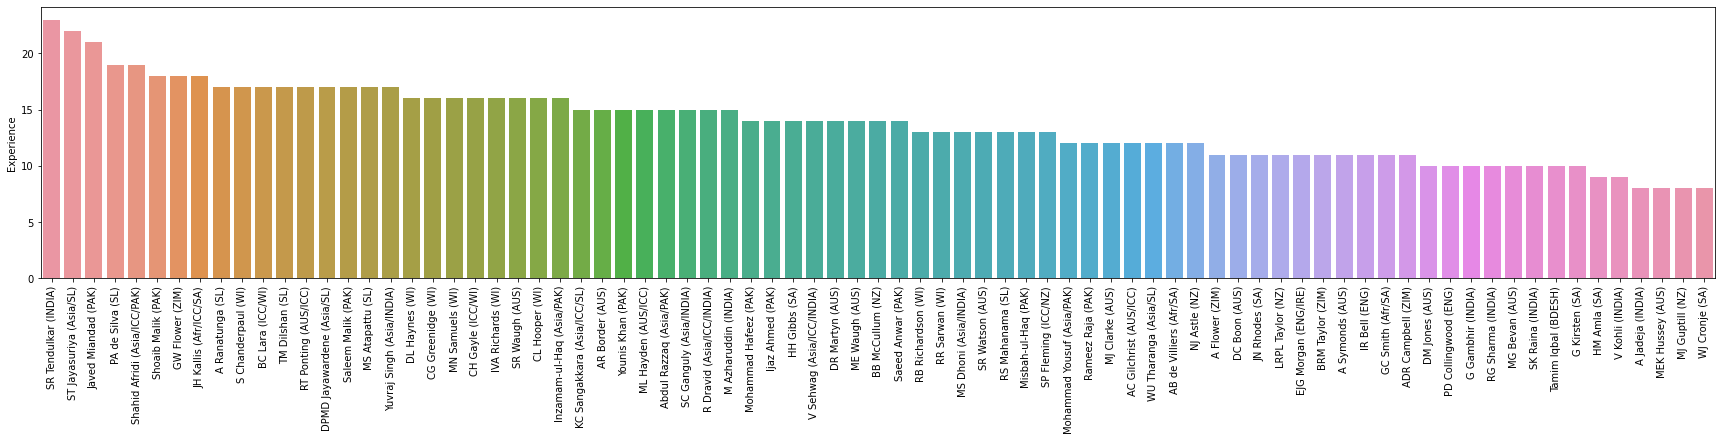

In [24]:
plt.figure(figsize = (30,5))
exp = df[['Player','Exp']].sort_values('Exp', ascending = False)
ax = sns.barplot(x='Player', y='Exp', data= exp)
ax.set(xlabel = '', ylabel= 'Experience')
plt.xticks(rotation=90)
plt.show()

## Correlation heatmap

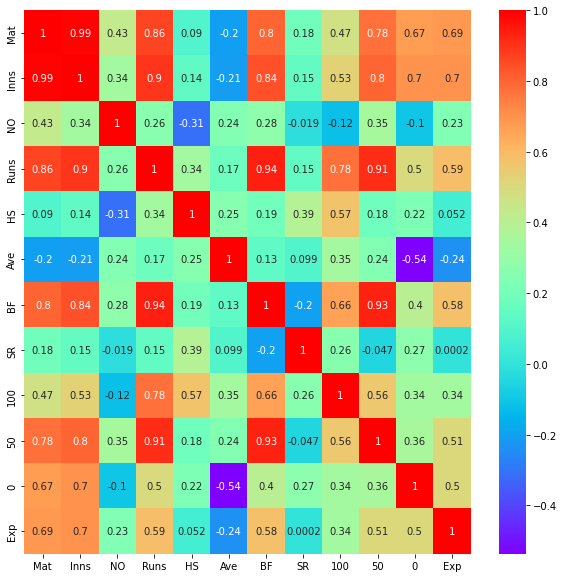

In [25]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, cmap="rainbow")
plt.savefig('Correlation')
plt.show()

## Copying the original dataset

In [26]:
# Dropping Player field as final dataframe will only contain data columns

df_drop = df.copy()
player = df_drop.pop('Player')

In [27]:
df_drop.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


## Implementing the standardscaler

In [28]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_drop)
df_scaled 

array([[ 2.95528204e+00,  3.16933340e+00,  7.64962749e-01,
         4.26232808e+00,  1.63244320e+00,  1.07229395e+00,
         3.68121424e+00,  7.03151526e-01,  4.65672622e+00,
         3.05005720e+00,  1.14583653e+00,  2.81278702e+00],
       [ 2.15517925e+00,  2.13891509e+00,  7.64962749e-01,
         2.60911662e+00,  6.35223595e-01,  5.87724608e-01,
         2.63538469e+00, -4.41394951e-02,  1.67188751e+00,
         2.86541772e+00,  2.96670622e-01,  3.80938324e-01],
       [ 1.76190839e+00,  1.92424461e+00,  6.25396797e-01,
         2.40009894e+00,  4.74381724e-01,  5.96225824e-01,
         2.31965067e+00,  1.10996904e-01,  2.29372891e+00,
         2.18840630e+00,  1.14583653e+00,  9.88900497e-01],
       [ 2.71118288e+00,  2.89741746e+00, -8.40045698e-01,
         2.29204075e+00,  1.27859108e+00, -1.04790945e+00,
         1.58829472e+00,  1.20709133e+00,  2.04499235e+00,
         1.32675540e+00,  3.52350108e+00,  2.50880593e+00],
       [ 2.75186607e+00,  2.68274698e+00,  6.2539679

In [30]:
df_df1 = pd.DataFrame(df_scaled, columns = [ 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100',
                                            '50', '0', 'Exp'])
df_df1.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,2.955282,3.169333,0.764963,4.262328,1.632443,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837,2.812787
1,2.155179,2.138915,0.764963,2.609117,0.635224,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671,0.380938
2,1.761908,1.924245,0.625397,2.400099,0.474382,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837,0.988900
3,2.711183,2.897417,-0.840046,2.292041,1.278591,-1.047909,1.588295,1.207091,2.044992,1.326755,3.523501,2.508806
4,2.751866,2.682747,0.625397,1.984430,-0.168986,-0.876185,1.996354,-0.034000,0.925678,1.880674,2.504502,0.988900


## Implementing K-Means

In [31]:
from sklearn.cluster import KMeans

## Elbow-Method

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

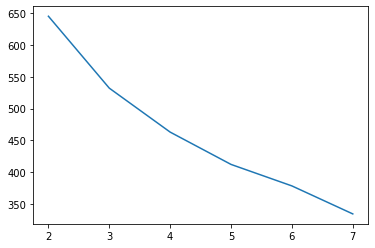

In [32]:
# Elbow curve method to find the ideal number of clusters.

clusters=list(range(2,8))
ssd = []
for num_clusters in clusters:
    model_clus = KMeans(n_clusters = num_clusters)
    model_clus.fit(df_df1)
    ssd.append(model_clus.inertia_)

plt.plot(clusters,ssd);

## Model Building

In [33]:
cluster = KMeans(n_clusters=4)
cluster.fit(df_df1)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

## Figure out how many clusters

In [34]:
# Cluster labels

cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 3, 2, 3, 0, 2, 0,
       0, 0, 3, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

## Cluster labels wrt dataset

In [35]:
df['Cluster_Id'] = cluster.labels_
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Id
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,1
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,1
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,1
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,1
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,1


## 1st Cluster

In [36]:
df[df['Cluster_Id']==0].sort_values(by = ['NO','Ave','SR'], ascending = [False,False,False]).head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Id
30,SR Waugh (AUS),325,288,58,7569,120,32.90,9971,75.91,3,45,15,16,0
14,M Azharuddin (INDIA),334,308,54,9378,153,36.92,12669,74.02,7,58,9,15,0
31,A Ranatunga (SL),269,255,47,7456,131,35.84,9571,77.90,4,49,18,17,0
29,MJ Clarke (AUS),245,223,44,7981,130,44.58,10104,78.98,8,58,10,12,0
32,Javed Miandad (PAK),233,218,41,7381,119,41.70,11014,67.01,8,50,8,21,0


## 2nd cluster

In [37]:
df[df['Cluster_Id']==1].sort_values(by = ['NO','Ave','SR'], ascending = [False,False,False]).head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Id
6,JH Kallis (Afr/ICC/SA),328,314,53,11579,139,44.36,15885,72.89,17,86,17,18,1
5,Inzamam-ul-Haq (Asia/PAK),378,350,53,11739,137,39.52,15812,74.24,10,83,20,16,1
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,1
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,1
8,R Dravid (Asia/ICC/INDIA),344,318,40,10889,153,39.16,15284,71.24,12,83,13,15,1


## 3rd cluster

In [38]:
df[df['Cluster_Id']==2].sort_values(by = ['NO','Ave','SR'], ascending = [False,False,False]).head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Id
13,MS Dhoni (Asia/INDIA),295,255,70,9496,183,51.32,10706,88.69,10,64,8,13,2
15,AB de Villiers (Afr/SA),222,213,39,9319,162,53.55,9295,100.25,24,53,7,12,2
25,V Kohli (INDIA),188,180,29,8146,183,53.94,8952,90.99,27,43,11,9,2
59,SR Watson (AUS),190,169,27,5757,185,40.54,6365,90.44,9,33,12,13,2
42,IVA Richards (WI),187,167,24,6721,189,47.00,7451,90.20,11,45,7,16,2


## 4th cluster

In [39]:
df[df['Cluster_Id']==3].sort_values(by = ['NO','Ave','SR'], ascending = [False,False,False]).head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Id
38,MG Bevan (AUS),232,196,67,6912,108,53.58,9320,74.16,6,46,5,10,3
78,Abdul Razzaq (Asia/PAK),265,228,57,5080,112,29.70,6252,81.25,3,23,14,15,3
68,DR Martyn (AUS),208,182,51,5346,144,40.80,6877,77.73,5,37,10,14,3
53,JN Rhodes (SA),245,220,51,5935,121,35.11,7336,80.90,2,33,12,11,3
64,MEK Hussey (AUS),185,157,44,5442,109,48.15,6243,87.16,3,39,3,8,3


# References:

1. Sklearn Clustering : https://scikit-learn.org/stable/modules/clustering.html
2. Kaggle : https://www.kaggle.com/
3. StandardScaler : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler

4. Normalisation : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.minmax_scale.html#sklearn.preprocessing.minmax_scale

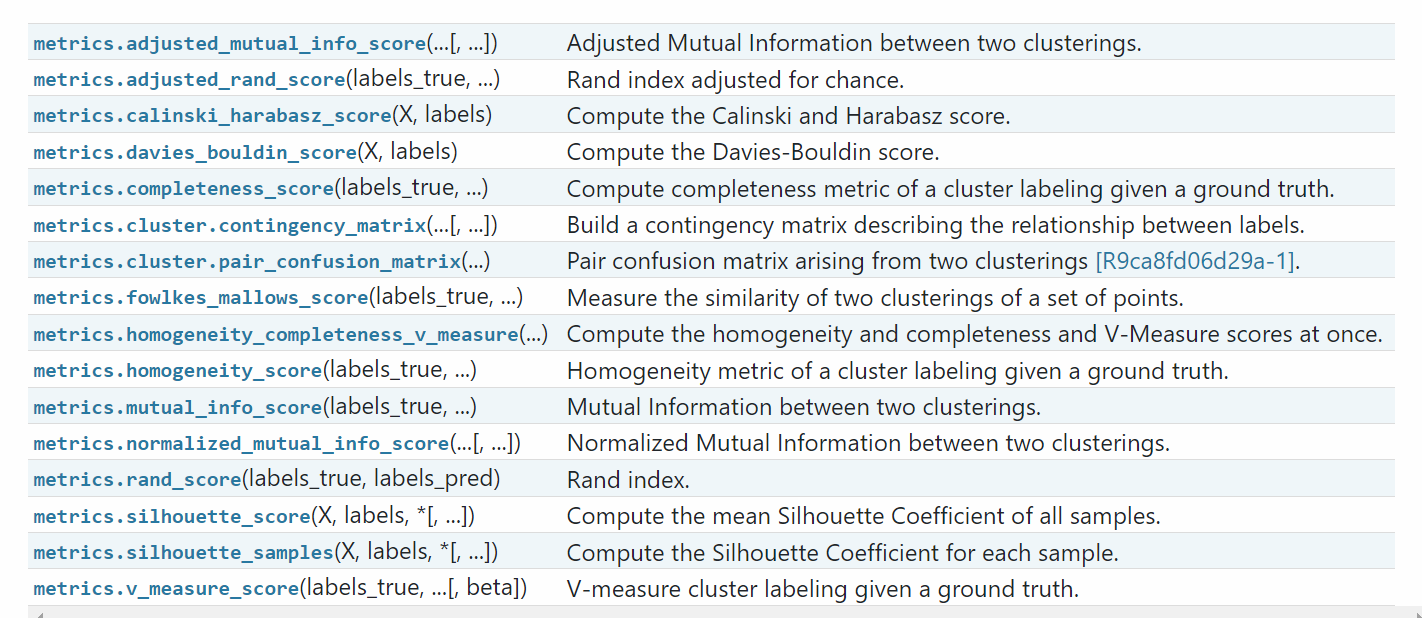